In [11]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

%matplotlib inline
sns.set()

df_math = pd.read_csv('data/student-mat.csv',delimiter = ';',header=0)
df_lang = pd.read_csv('data/student-por.csv',delimiter= ';',header=0)

#removing outliers where final grades G3 = 0
df_math = df_math[df_math['G3'] != 0]
df_lang = df_lang[df_lang['G3'] != 0]

#create separate dataframes for students from both schools for both classes
df_math_gp = df_math[df_math['school'] == 'GP']
df_math_ms = df_math[df_math['school'] == 'MS']

df_lang_gp = df_lang[df_lang['school'] == 'GP']
df_lang_ms = df_lang[df_lang['school'] == 'MS']

for i in list(df_lang_gp):
    if i !='G1':
        print type(i)
    

<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>


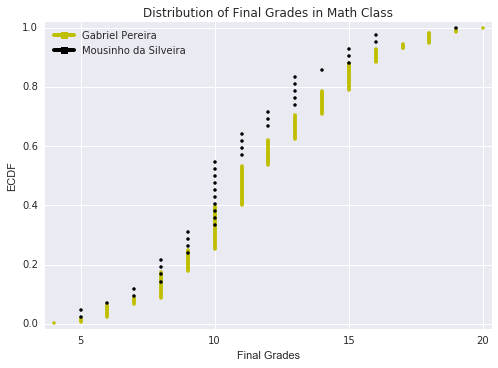

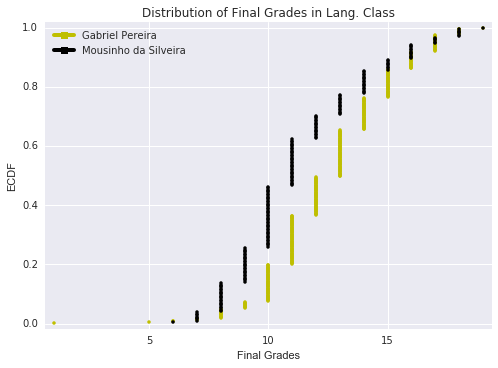

In [25]:
#ECDF comparing final grades between students at each school for each class
        #function that creates the necessary variables for an ecdf

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n=float(len(data))

    # x-data for the ECDF: x
    x=np.sort(data)

    # y-data for the ECDF: y
    y= np.arange(1, n+1) / n
    
    return x, y

legend_elements_2 = [Line2D([0], [0],marker='s', color='y', lw=4, label='Gabriel Pereira'),Line2D([0], [0],marker='s', color='k', lw=4, label='Mousinho da Silveira')]


    # Variables necessary for ecdf's for each class are created below.
var, var_1 = ecdf(df_math_gp['G3'])
var_2, var_3 = ecdf(df_math_ms['G3'])
var_4, var_5 = ecdf(df_lang_gp['G3'])
var_6, var_7 = ecdf(df_lang_ms['G3'])


# ECDF plot for the comparison of math scores between schools
plt.figure(2)
_ = plt.plot(var,var_1,marker='.',linestyle='none',color='y')
_ = plt.plot(var_2,var_3,marker='.',linestyle='none',color='k')
_ = plt.title('Distribution of Final Grades in Math Class')
_ = plt.xlabel('Final Grades')
_ = plt.ylabel('ECDF')
_ = plt.legend(handles = legend_elements_2, loc= 'best')
plt.margins(0.02)
    
    # ECDF plot for the comparison of language scores between schools
plt.figure(3)
_ = plt.plot(var_4,var_5,marker='.',linestyle='none',color='y')
_ = plt.plot(var_6,var_7,marker='.',linestyle='none',color='k')
_ = plt.title('Distribution of Final Grades in Lang. Class')
_ = plt.xlabel('Final Grades')
_ = plt.ylabel('ECDF')
_ = plt.legend(handles = legend_elements_2, loc= 'best')
plt.margins(0.02)

The plots above seem to indicate that there is a difference between grade distributions at each school. A hypothesis test will be run below to determine if this is the case or not.


In [4]:
# final Grades G3 for each school and class
g3_m_gp = df_math_gp['G3']
g3_m_ms = df_math_ms['G3']
g3_l_gp = df_lang_gp['G3']
g3_l_ms = df_lang_ms['G3']


# Run a hypothesis test to see if the average final test scores are different between schools or if we can treat them as the same population

#h0: there is no difference between the avergae final test scores of students
#ha: there is a difference between the average final test scores of students
#alpha = 0.05

def h_test_mean_diff(data1, data2):
    "one tailed test for h0: u1-u2 = 0"
    
    mean1 = np.mean(data1)
    std1 = np.std(data1, ddof = 1)
    mean2 = np.mean(data2)
    std2 = np.std(data2, ddof = 1)

    n1 = float(len(data1))
    n2 = float(len(data2))
    
    std_combined = np.sqrt((std1**2/n1) + (std2**2/n2))
    
    z = (mean1 - mean2) / std_combined
    p = stats.norm.sf(abs(z))
    
    return z,p

#math class test
z, p = h_test_mean_diff(g3_m_gp, g3_m_ms)
print 'p value for difference in mean G3 score for math calsses =',"{0:.3f}".format(p)


#Language calss test
z1, p1 = h_test_mean_diff(g3_l_gp, g3_l_ms)
print 'p value for difference in mean G3 score for lang calsses =',"{0:.3f}".format(p1)


p value for difference in mean G3 score for math calsses = 0.049
p value for difference in mean G3 score for lang calsses = 0.000


Based on the hypothesis test ran above we can conclude that there is a difference between the average final test scores between students who go to each school in both calsses. Students who go to Gabriel Pereira on average tend to perform better than students who go to Mousinho da Silveira. More tests would need to run to determine the primary cause of this discrepency, however, Gabriel Pereira is the larger school and may have access to more funding and resources that a smaller school like Mousinho da Silveira may not.


In [5]:
# does attending nursery school have an impact on final grades?
#h0: attending nursery school has no impact on final grades 
#ha: attending nursery school does have an impact on final grades


g3_m_gp_n = df_math_gp.loc[:,['G3','nursery']]
g3_m_ms_n = df_math_ms.loc[:,['G3','nursery']]
g3_l_gp_n = df_lang_gp.loc[:,['G3','nursery']]
g3_l_ms_n = df_lang_ms.loc[:,['G3','nursery']]

#math calss no nursery and nursery dataframes
gp_n_m = g3_m_gp_n[g3_m_gp_n['nursery'] == 'yes']['G3']
gp_no_n_m = g3_m_gp_n[g3_m_gp_n['nursery'] == 'no']['G3']
ms_n_m = g3_m_ms_n[g3_m_ms_n['nursery'] == 'yes']['G3']
ms_no_n_m = g3_m_ms_n[g3_m_ms_n['nursery'] == 'no']['G3']

#lang classes no nursery and nursery dataframes
gp_n_l = g3_l_gp_n[g3_l_gp_n['nursery'] == 'yes']['G3']
gp_no_n_l = g3_l_gp_n[g3_l_gp_n['nursery'] == 'no']['G3']
ms_n_l = g3_l_ms_n[g3_l_ms_n['nursery'] == 'yes']['G3']
ms_no_n_l = g3_l_ms_n[g3_l_ms_n['nursery'] == 'no']['G3']


#Math Class Tests
#GP 
z2,p2 = h_test_mean_diff(gp_n_m, gp_no_n_m)
print 'p value for difference in mean math G3 score for students at GP who attended nursery school and those who did not =',"{0:.3f}".format(p2)
#MS
z3,p3 = h_test_mean_diff(ms_n_m, ms_no_n_m)
print 'p value for difference in mean math G3 score for students at MS who attended nursery school and those who did not =',"{0:.3f}".format(p3)

#Lang Class Tests
#GP
z4,p4 = h_test_mean_diff(gp_n_l, gp_no_n_l)
print 'p value for difference in mean lang G3 score for students at GP who attended nursery school and those who did not =',"{0:.3f}".format(p4)
#MS
z5,p5 = h_test_mean_diff(ms_n_l, ms_no_n_l)
print 'p value for difference in mean lang G3 score for students at MS who attended nursery school and those who did not =',"{0:.3f}".format(p5)


p value for difference in mean math G3 score for students at GP who attended nursery school and those who did not = 0.210
p value for difference in mean math G3 score for students at MS who attended nursery school and those who did not = 0.184
p value for difference in mean lang G3 score for students at GP who attended nursery school and those who did not = 0.021
p value for difference in mean lang G3 score for students at MS who attended nursery school and those who did not = 0.355


The results of hypothesis tests done to determine if nursery had any impact on the final grades of students showed that there was no statistically significant difference between the means of both samples. There was one test, performed on students in a language class at GP, that returned p value signaling a significant difference in the means; however, the other three tests showed no significant difference so we can conclude that nursery school attendance has no affect on final G3 test scores.

In [6]:
# does having internet access have an impact on final grades?
#h0: internet access has no impact on final grades 
#ha: internet access does have an impact on final grades


g3_m_gp_i = df_math_gp.loc[:,['G3','internet']]
g3_m_ms_i = df_math_ms.loc[:,['G3','internet']]
g3_l_gp_i = df_lang_gp.loc[:,['G3','internet']]
g3_l_ms_i = df_lang_ms.loc[:,['G3','internet']]

#math calss no internet and internet dataframes
gp_i_m = g3_m_gp_i[g3_m_gp_i['internet'] == 'yes']['G3']
gp_no_i_m = g3_m_gp_i[g3_m_gp_i['internet'] == 'no']['G3']
ms_i_m = g3_m_ms_i[g3_m_ms_i['internet'] == 'yes']['G3']
ms_no_i_m = g3_m_ms_i[g3_m_ms_i['internet'] == 'no']['G3']

#lang classes no internet and internet dataframes
gp_i_l = g3_l_gp_i[g3_l_gp_i['internet'] == 'yes']['G3']
gp_no_i_l = g3_l_gp_i[g3_l_gp_i['internet'] == 'no']['G3']
ms_i_l = g3_l_ms_i[g3_l_ms_i['internet'] == 'yes']['G3']
ms_no_i_l = g3_l_ms_i[g3_l_ms_i['internet'] == 'no']['G3']

#Math Class Tests
#GP 
z6,p6 = h_test_mean_diff(gp_i_m, gp_no_i_m)
print 'p value for difference in mean math G3 score for students at GP who have internet access and those who do not =',"{0:.3f}".format(p6)
#MS
z7,p7 = h_test_mean_diff(ms_i_m, ms_no_i_m)
print 'p value for difference in mean math G3 score for students at MS who have internet access and those who do not =',"{0:.3f}".format(p7)

#Lang Class Tests
#GP
z8,p8 = h_test_mean_diff(gp_i_l, gp_no_i_l)
print 'p value for difference in mean lang G3 score for students at GP who have internet access and those who do not =',"{0:.3f}".format(p8)
#MS
z9,p9 = h_test_mean_diff(ms_i_l, ms_no_i_l)
print 'p value for difference in mean lang G3 score for students at MS who have internet access and those who do not =',"{0:.3f}".format(p9)




p value for difference in mean math G3 score for students at GP who have internet access and those who do not = 0.054
p value for difference in mean math G3 score for students at MS who have internet access and those who do not = 0.066
p value for difference in mean lang G3 score for students at GP who have internet access and those who do not = 0.042
p value for difference in mean lang G3 score for students at MS who have internet access and those who do not = 0.115


The results from the hypothesis tests conducted on whether or not internet access has any affect on final grade revealed that there is some correlation between having internet access and G3 test scores. In 3 of the 4 classes tested had p-values in the 0.04-0.07 range and the 4th test returned a p-value of .115. While the conditions set by alpha = 0.05 are not met, consistently low p-values across all classes indicats that there is some correlation between internet access and G3 scores.

In [7]:
# does having extra educational support have an impact on final grades?
#h0: extra educational support has no impact on final grades 
#ha: extra educational support does have an impact on final grades


g3_m_gp_ss = df_math_gp.loc[:,['G3','schoolsup']]
g3_m_ms_ss = df_math_ms.loc[:,['G3','schoolsup']]
g3_l_gp_ss = df_lang_gp.loc[:,['G3','schoolsup']]
g3_l_ms_ss = df_lang_ms.loc[:,['G3','schoolsup']]

#math calss no educational support and educational support dataframes
gp_ss_m = g3_m_gp_ss[g3_m_gp_ss['schoolsup'] == 'yes']['G3']
gp_no_ss_m = g3_m_gp_ss[g3_m_gp_ss['schoolsup'] == 'no']['G3']
ms_ss_m = g3_m_ms_ss[g3_m_ms_ss['schoolsup'] == 'yes']['G3']
ms_no_ss_m = g3_m_ms_ss[g3_m_ms_ss['schoolsup'] == 'no']['G3']

#lang classes no educational support and educational support dataframes
gp_ss_l = g3_l_gp_ss[g3_l_gp_ss['schoolsup'] == 'yes']['G3']
gp_no_ss_l = g3_l_gp_ss[g3_l_gp_ss['schoolsup'] == 'no']['G3']
ms_ss_l = g3_l_ms_ss[g3_l_ms_ss['schoolsup'] == 'yes']['G3']
ms_no_ss_l = g3_l_ms_ss[g3_l_ms_ss['schoolsup'] == 'no']['G3']

#Math Class Tests
#GP 
z10,p10 = h_test_mean_diff(gp_ss_m, gp_no_ss_m)
print 'p value for difference in mean math G3 score for students at GP who received educational support and those who do not =',"{0:.3f}".format(p10)
#MS
z11,p11 = h_test_mean_diff(ms_ss_m, ms_no_ss_m)
print 'p value for difference in mean math G3 score for students at MS who received educational support and those who do not =',"{0:.3f}".format(p11)

#Lang Class Tests
#GP
z12,p12 = h_test_mean_diff(gp_ss_l, gp_no_ss_l)
print 'p value for difference in mean lang G3 score for students at GP who received educational support and those who do not =',"{0:.3f}".format(p12)
#MS
z13,p13 = h_test_mean_diff(ms_ss_l, ms_no_ss_l)
print 'p value for difference in mean lang G3 score for students at MS who received educational support and those who do not =',"{0:.3f}".format(p13)

p value for difference in mean math G3 score for students at GP who received educational support and those who do not = 0.000
p value for difference in mean math G3 score for students at MS who received educational support and those who do not = nan
p value for difference in mean lang G3 score for students at GP who received educational support and those who do not = 0.000
p value for difference in mean lang G3 score for students at MS who received educational support and those who do not = 0.322


The results of this hypothesis test seem to indicate that school support does make an impact at GP, but at MS, where access to educational support is limited, there seems to be no indication that educational support had any affect. However, becasue the p-values returned for the tests run at GP were both 0, extra edcuational support seems to have an impact when done in a certain manner.

In [33]:
#are age and G3 scores correlated?
#h0: There is no correlation between age and G3 test scores
#ha; There is some correlation between age and G3 test scores

age_m_gp = df_math_gp.loc[:,['age','G3']]
age_m_ms = df_math_ms.loc[:,['age','G3']]
age_l_gp = df_lang_gp.loc[:,['age','G3']]
age_l_ms = df_lang_ms.loc[:,['age','G3']]


def pearson_r(x,y):
    correlation_matrix = np.corrcoef(x,y)
    return correlation_matrix[0,1]

def perm_corr_samples(x,y,size = 1):
    perm_reps = np.empty(size)
    
    for i in range(size):
        x_1 = np.random.permutation(x)
        perm_reps[i] = pearson_r(x_1,y)
        
    return perm_reps




observed_correlation_1 = pearson_r(age_m_gp['age'], age_m_gp['G3'])
print 'observed_correlation between age and G3 scores in GP math class =',observed_correlation_1
t1 = perm_corr_samples(age_m_gp['age'],age_m_gp['G3'],10000)
p_value_t1 = np.sum(t1 < observed_correlation_1) / float(10000)
print 'p-value =',p_value_t1


observed_correlation_2 = pearson_r(age_m_ms['age'], age_m_ms['G3'])
print 'observed_correlation between age and G3 scores in MS match class =',observed_correlation_2
t2 = perm_corr_samples(age_m_ms['age'],age_m_ms['G3'],10000)
p_value_t2 = np.sum(t2 < observed_correlation_2) / float(10000)
print 'p-value =',p_value_t2

observed_correlation_3 = pearson_r(age_l_gp['age'], age_l_gp['G3'])
print 'observed_correlation between age and G3 scores in GP lang class =',observed_correlation_3
t3 = perm_corr_samples(age_l_gp['age'],age_l_gp['G3'],10000)
p_value_t3 = np.sum(t3 < observed_correlation_3) / float(10000)
print 'p-value =',p_value_t3

observed_correlation_4 = pearson_r(age_l_ms['age'], age_l_ms['G3'])
print 'observed_correlation between age and G3 scores in MS lang class =',observed_correlation_4
t4 = perm_corr_samples(age_l_ms['age'],age_l_ms['G3'],10000)
p_value_t4 = np.sum(t4 < observed_correlation_4) / float(10000)
print 'p-value =',p_value_t4


# plt.figure(1)
# _ = sns.stripplot(age_m_gp['age'],age_m_gp['G3'])
# _ = plt.xlabel('Age')
# _ = plt.ylabel('G3 Score')
# _ = plt.title('Math Class at GP')

# plt.figure(2)
# _ = plt.scatter(age_m_ms['age'],age_m_ms['G3'])
# _ = plt.xlabel('Age')
# _ = plt.ylabel('G3 Score')
# _ = plt.title('Math Class at MS')

# plt.figure(3)
# _ = plt.scatter(age_l_gp['age'],age_l_gp['G3'])
# _ = plt.xlabel('Age')
# _ = plt.ylabel('G3 Score')
# _ = plt.title('Lang Class at GP')

# plt.figure(4)
# _ = plt.scatter(age_l_ms['age'],age_l_ms['G3'])
# _ = plt.xlabel('Age')
# _ = plt.ylabel('G3 Score')
# _ = plt.title('Lang Class at MS')

# plt.show()



observed_correlation between age and G3 scores in GP math class = -0.108862367383
p-value = 0.0289
observed_correlation between age and G3 scores in MS match class = -0.216768599592
p-value = 0.0751
observed_correlation between age and G3 scores in GP lang class = -0.0066131553793
p-value = 0.4369
observed_correlation between age and G3 scores in MS lang class = -0.0603307197967
p-value = 0.1909


The hypothesis tests above revealed that there is no real correlation between age and G3 scores.While the testing done did seem to indicate a slight negative correlation between age and G3 scores in the math class at GP, however the other three tests returned p-values all greater than 0.05, two of which were >3x 0.05, so it would be safe to assume that there is no correlation between the two variables.


20
22


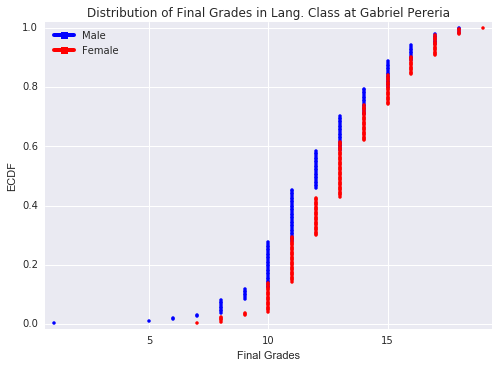

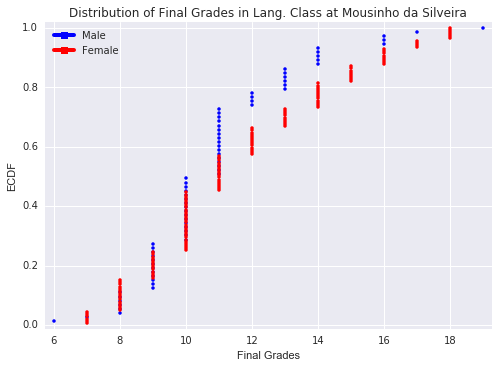

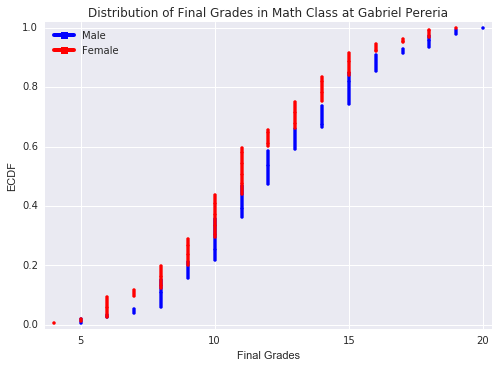

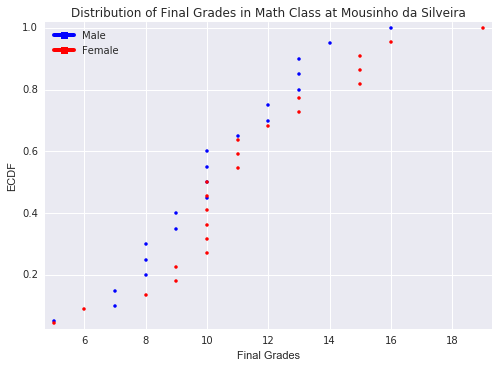

In [36]:
#dataframes containing sex and test score data
g3_m_gp_s = df_math_gp.loc[:,['G3','sex']]
g3_m_ms_s = df_math_ms.loc[:,['G3','sex']]
g3_l_gp_s = df_lang_gp.loc[:,['G3','sex']]
g3_l_ms_s = df_lang_ms.loc[:,['G3','sex']]

#math calss male and female dataframes
gp_m_m = g3_m_gp_s[g3_m_gp_s['sex'] == 'M']['G3']
gp_f_m = g3_m_gp_s[g3_m_gp_s['sex'] == 'F']['G3']
ms_m_m = g3_m_ms_s[g3_m_ms_s['sex'] == 'M']['G3']
ms_f_m = g3_m_ms_s[g3_m_ms_s['sex'] == 'F']['G3']

#lang classes male and female dataframes
gp_m_l = g3_l_gp_s[g3_l_gp_s['sex'] == 'M']['G3']
gp_f_l = g3_l_gp_s[g3_l_gp_s['sex'] == 'F']['G3']
ms_m_l = g3_l_ms_s[g3_l_ms_s['sex'] == 'M']['G3']
ms_f_l = g3_l_ms_s[g3_l_ms_s['sex'] == 'F']['G3']
  
        
    #Variables necessary for plotting ECDF's comparing scores based on gender and school 
var_16, var_17 = ecdf(gp_m_m)
var_18, var_19 = ecdf(gp_f_m)
var_20, var_21 = ecdf(ms_m_m)
var_22, var_23 = ecdf(ms_f_m)
var_24, var_25 = ecdf(gp_m_l)
var_26, var_27 = ecdf(gp_f_l)
var_28, var_29 = ecdf(ms_m_l)
var_30, var_31 = ecdf(ms_f_l)
    
    
    # ECDF plot for the comparison of math scores between genders at GP
plt.figure(6)
_ = plt.plot(var_16,var_17,marker='.',linestyle='none',color='b')
_ = plt.plot(var_18,var_19,marker='.',linestyle='none',color='r')
_ = plt.title('Distribution of Final Grades in Math Class at Gabriel Pereria')
_ = plt.xlabel('Final Grades')
_ = plt.ylabel('ECDF')
legend_elements_3 = [Line2D([0], [0],marker='s', color='b', lw=4, label='Male'),Line2D([0], [0],marker='s', color='r', lw=4, label='Female')]
_ = plt.legend(handles = legend_elements_3, loc= 'best')
plt.margins(0.02)

    # ECDF plot for the comparison of math scores between genders at MS 
plt.figure(7)
_ = plt.plot(var_20,var_21,marker='.',linestyle='none',color='b')
_ = plt.plot(var_22,var_23,marker='.',linestyle='none',color='r')
_ = plt.title('Distribution of Final Grades in Math Class at Mousinho da Silveira')
_ = plt.xlabel('Final Grades')
_ = plt.ylabel('ECDF')
legend_elements_3 = [Line2D([0], [0],marker='s', color='b', lw=4, label='Male'),Line2D([0], [0],marker='s', color='r', lw=4, label='Female')]
_ = plt.legend(handles = legend_elements_3, loc= 'best')
plt.margins(0.02)

    # ECDF plot for the comparison of lang scores between genders at GP
plt.figure(8)
_ = plt.plot(var_24,var_25,marker='.',linestyle='none',color='b')
_ = plt.plot(var_26,var_27,marker='.',linestyle='none',color='r')
_ = plt.title('Distribution of Final Grades in Lang. Class at Gabriel Pereria')
_ = plt.xlabel('Final Grades')
_ = plt.ylabel('ECDF')
legend_elements_3 = [Line2D([0], [0],marker='s', color='b', lw=4, label='Male'),Line2D([0], [0],marker='s', color='r', lw=4, label='Female')]
_ = plt.legend(handles = legend_elements_3, loc= 'best')
plt.margins(0.02)

    # ECDF plot for the comparison of lang scores between genders at MS
plt.figure(9)
_ = plt.plot(var_28,var_29,marker='.',linestyle='none',color='b')
_ = plt.plot(var_30,var_31,marker='.',linestyle='none',color='r')
_ = plt.title('Distribution of Final Grades in Lang. Class at Mousinho da Silveira')
_ = plt.xlabel('Final Grades')
_ = plt.ylabel('ECDF')
legend_elements_3 = [Line2D([0], [0],marker='s', color='b', lw=4, label='Male'),Line2D([0], [0],marker='s', color='r', lw=4, label='Female')]
_ = plt.legend(handles = legend_elements_3, loc= 'best')
plt.margins(0.02)


plt.show()


The plots above seem to indicate that there is a difference in G3 score distribution among the sexes. It seems as though men tend to do better on average in math classes, while women tend to do better on average in lang classes. However, it seems that women do tend to do better in their match class at MS. Hypothesis tests sill be performed below to assess the accuracy of these statements.

In [9]:
# does sex have an impact on G3 scores?
#h0: sex has no impact on final grades 
#ha: sex does have an impact on final grades

#Math Class Tests
#GP 
z14,p14 = h_test_mean_diff(gp_m_m, gp_f_m)
print 'p value for difference in mean math G3 score for male and female students at GP =',"{0:.3f}".format(p14)
print "{0:.3f}".format(z14)
#MS
z15,p15 = h_test_mean_diff(ms_m_m, ms_f_m)
print 'p value for difference in mean math G3 score for male and female students at MS =',"{0:.3f}".format(p15)

#Lang Class Tests
#GP
z16,p16 = h_test_mean_diff(gp_m_l, gp_f_l)
print 'p value for difference in mean lang G3 score for male and female students at GP =',"{0:.3f}".format(p16)
print "{0:.3f}".format(z16)
#MS
z17,p17 = h_test_mean_diff(ms_m_l, ms_f_l)
print 'p value for difference in mean lang G3 score for male and female students at MS =',"{0:.3f}".format(p17)
print "{0:.3f}".format(z17)


p value for difference in mean math G3 score for male and female students at GP = 0.008
2.431
p value for difference in mean math G3 score for male and female students at MS = 0.137
p value for difference in mean lang G3 score for male and female students at GP = 0.000
-3.602
p value for difference in mean lang G3 score for male and female students at MS = 0.033
-1.839


Hypothesis testing revealed that there are statistically signifcant differences betweeen mean scores of males and females in both math and english classes. Male students have higher math scores on average, while women have higher language scores on average. 